In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ks_url = "https://raw.githubusercontent.com/longthp/betaverse/main/data/kingsport.csv"
es_url = "https://raw.githubusercontent.com/longthp/betaverse/main/data/elipsport.csv"
ls_url = "https://raw.githubusercontent.com/longthp/betaverse/main/data/lifesport.csv"

ks_df = pd.read_csv(ks_url)
es_df = pd.read_csv(es_url)
ls_df = pd.read_csv(ls_url)

In [ ]:
ks_df.head()

,title,type,price,rating
0,Ghế massage KingSport Luxury B5,premium,235.000.000đ,34 đánh giá
1,Ghế massage KingSport Luxury B1,premium,79.000.000đ,28 đánh giá
2,Ghế Massage Kingsport Luxury G31 New,premium,105.000.000đ,26 đánh giá
3,Ghế massage KingSport G99,premium,99.000.000đ,91 đánh giá
4,Ghế Massage Kingsport Luxury G4 New,premium,85.000.000đ,79 đánh giá


In [ ]:
es_df.head()

,title,current_price,old_price
0,Ghế Massage ELIP Mozart - Beige,68.000.000đ,88.000.000đ
1,Ghế Massage ELIP Plutoni - Gold,44.000.000đ,57.500.000đ
2,"Ghế Massage ELIP Galile (AI, ion âm)",17.900.000đ,30.500.000đ
3,Ghế Massage ELIP Hoper (Black),45.000.000đ,62.900.000đ
4,Ghế Massage ELIP Lion Pro (AI),81.000.000đ,NaN


In [ ]:
ls_df.head()

,title,current_price,old_price,rating
0,Ghế Massage LifeSport LS-500,46.000.000đ,105.000.000đ,12 đánh giá
1,Ghế Massage LifeSport LS-450,28.900.000đ,48.000.000đ,5 đánh giá
2,Ghế massage Lifesport LS-168,19.900.000đ,27.000.000đ,1 đánh giá
3,Ghế Massage Lifesport LS-350 Plus,52.000.000đ,95.000.000đ,4 đánh giá
4,Ghế massage Lifesport LS-2800 Plus,45.000.000đ,86.000.000đ,1 đánh giá


# Data cleaning

In [ ]:
es_df["old_price"] = es_df.old_price.fillna("0đ").apply(lambda x: x[0:-1].replace(".", "")).astype(int)
es_df["current_price"] = es_df.current_price.apply(lambda x: x[0:-1].replace(".", "")).astype(int)

ls_df["old_price"] = ls_df.old_price.fillna("0đ").apply(lambda x: x[0:-1].replace(".", "")).astype(int)
ls_df["current_price"] = ls_df.current_price.apply(lambda x: x[0:-1].replace(".", "")).astype(int)

def mapType(df, lowerLimit, upperLimit):
    productType = []
    for newPrice, oldPrice in zip(df.current_price, df.old_price):
        if oldPrice >= lowerLimit:
            productType.append("Cao cấp")
        elif newPrice <= upperLimit:
            productType.append("Phổ thông")
        elif oldPrice == 0 and newPrice >= lowerLimit:
            productType.append("Cao cấp")
        else:
            productType.append("Phổ thông")

    return productType

# elipsport.vn
# Thương gia: old_price >= 45m
# Phổ thông: current_price <= 44m
es_df["type"] = mapType(es_df, 45000000, 44000000)

# lifesport.vn
# Thương gia (Cao cấp): old_price >= 85m
# Phổ thông (Giá rẻ): current_price <= 52m
ls_df["type"] = mapType(ls_df, 85000000, 52000000)

In [ ]:
ks_df["type"] = ["Cao cấp" if p == "premium" else "Phổ thông" for p in ks_df.type]
ks_df["price"] = ks_df.price.apply(lambda x: x[0:-1].replace(".", "")).astype(int)
ks_df["rating"] = ks_df.rating.apply(lambda x: x.split(" ")[0]).astype(int)

ks_df.head()

,title,type,price,rating
0,Ghế massage KingSport Luxury B5,Cao cấp,235000000,34
1,Ghế massage KingSport Luxury B1,Cao cấp,79000000,28
2,Ghế Massage Kingsport Luxury G31 New,Cao cấp,105000000,26
3,Ghế massage KingSport G99,Cao cấp,99000000,91
4,Ghế Massage Kingsport Luxury G4 New,Cao cấp,85000000,79


In [ ]:
ls_df["rating"] = ls_df.rating.fillna("0 đánh giá").apply(lambda x: x.split(" ")[0]).astype(int)
ls_df.head()

,title,current_price,old_price,rating,type
0,Ghế Massage LifeSport LS-500,46000000,105000000,12,Cao cấp
1,Ghế Massage LifeSport LS-450,28900000,48000000,5,Phổ thông
2,Ghế massage Lifesport LS-168,19900000,27000000,1,Phổ thông
3,Ghế Massage Lifesport LS-350 Plus,52000000,95000000,4,Cao cấp
4,Ghế massage Lifesport LS-2800 Plus,45000000,86000000,1,Cao cấp


# Data analysis

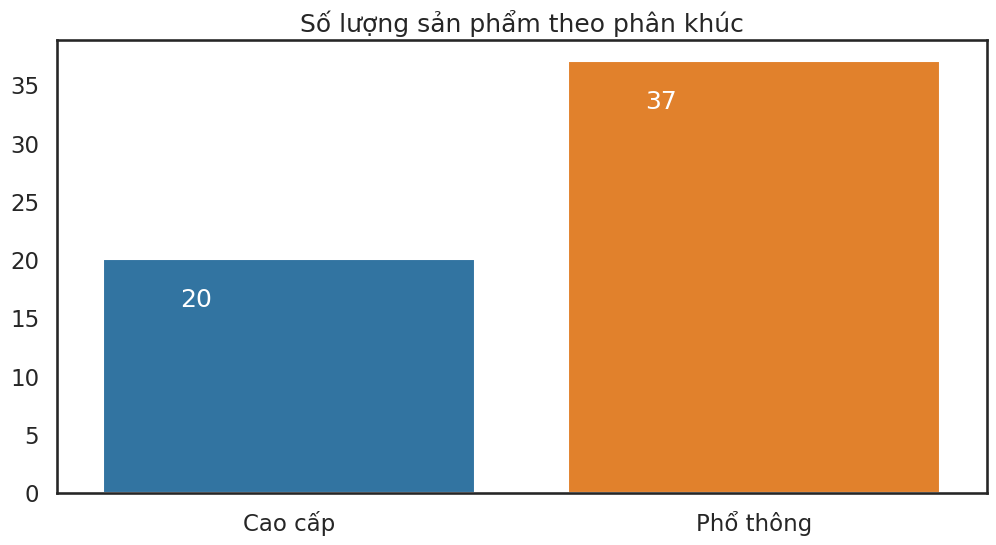

In [ ]:
with sns.axes_style("white"), sns.plotting_context("talk"):
    plt.figure(figsize= (12, 6), dpi= 100)
    ax = sns.countplot(
        data = ks_df,
        x = "type"
    )
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

    plt.title("Số lượng sản phẩm theo phân khúc")
    plt.xlabel("")
    plt.ylabel("");

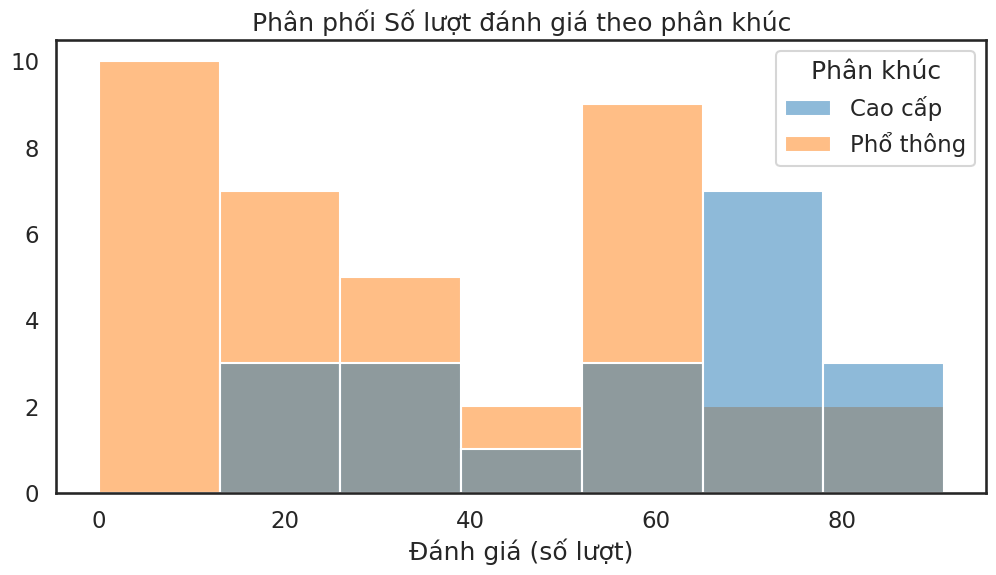

In [ ]:
with sns.axes_style("white"), sns.plotting_context("talk"):
    plt.figure(figsize= (12, 6), dpi= 100)
    ax = sns.histplot(
        data = ks_df,
        x = "rating",
        hue = "type",
    )
    plt.xlabel("Đánh giá (số lượt)")
    plt.ylabel("")
    plt.title("Phân phối Số lượt đánh giá theo phân khúc")
    ax.legend_.set_title("Phân khúc");

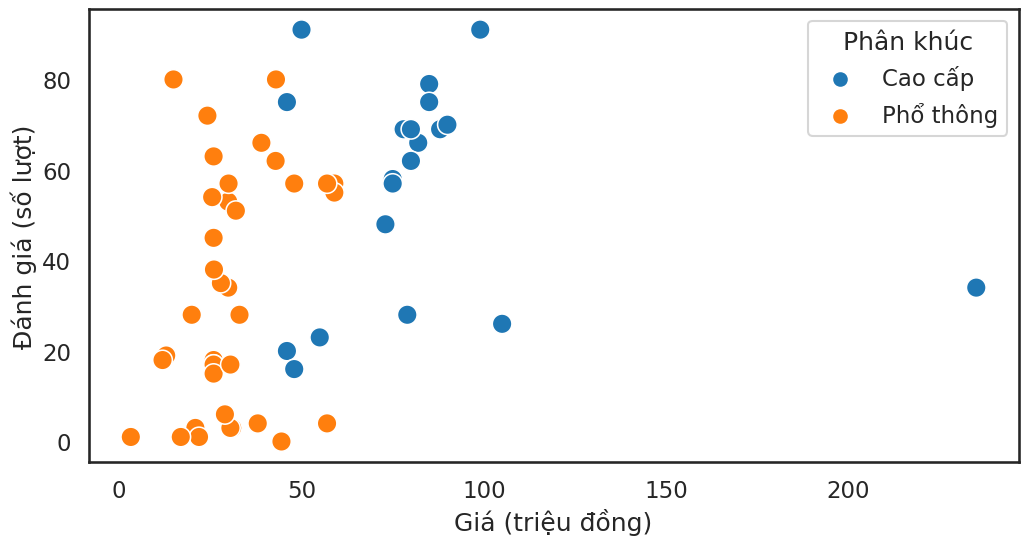

In [ ]:
with sns.axes_style("white"), sns.plotting_context("talk"):  
    plt.figure(figsize= (12, 6), dpi= 100)
    ax = sns.scatterplot(
        data = ks_df.eval("price = price / 1000000"),
        x = "price",
        y = "rating",
        hue = "type",
        s = 200
    )
    plt.xlabel("Giá (triệu đồng)")
    plt.ylabel("Đánh giá (số lượt)")
    ax.legend_.set_title("Phân khúc");

In [ ]:
ks = ks_df.loc[:, ["type", "price"]]
es = es_df.loc[:, ["type", "current_price"]]
ls = ls_df.loc[:, ["type", "current_price"]]

ks["brand"] = "Kingsport"
es["brand"] = "Elipsport"
ls["brand"] = "Lifesport"

ks.rename(columns= {"price": "current_price"}, inplace= True)

all_brands = pd.concat([ks, es, ls], ignore_index= True)

all_brands.head()

,type,current_price,brand
0,Cao cấp,235000000,Kingsport
1,Cao cấp,79000000,Kingsport
2,Cao cấp,105000000,Kingsport
3,Cao cấp,99000000,Kingsport
4,Cao cấp,85000000,Kingsport


In [ ]:
all_brands.groupby(["brand", "type"]).current_price.mean().reset_index()

,brand,type,current_price
0,Elipsport,Cao cấp,5.917105e+07
1,Elipsport,Phổ thông,1.902500e+07
2,Kingsport,Cao cấp,8.270000e+07
3,Kingsport,Phổ thông,3.093784e+07
4,Lifesport,Cao cấp,7.774444e+07
5,Lifesport,Phổ thông,2.722857e+07


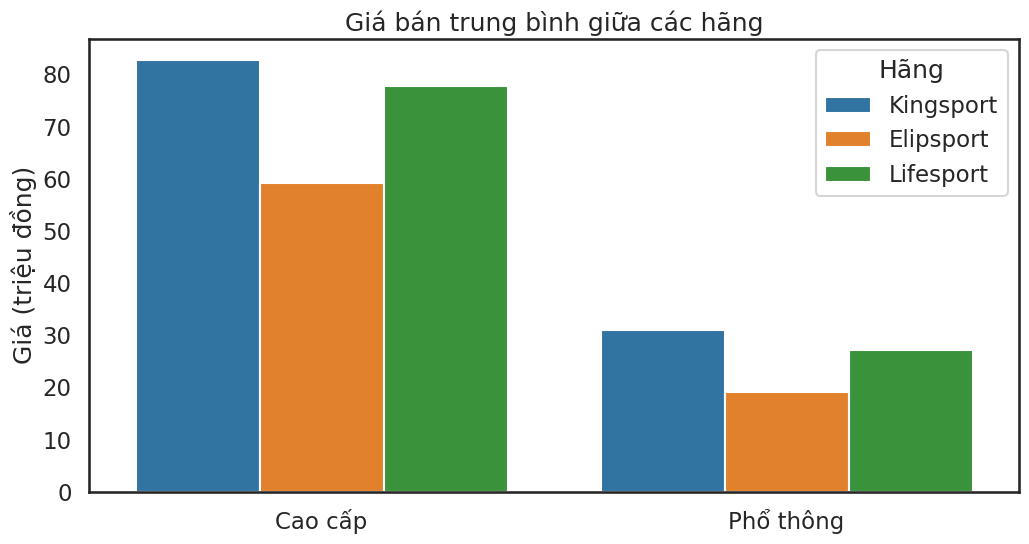

In [ ]:
data = all_brands.groupby(["type", "brand"]).current_price.mean().reset_index()
with sns.axes_style("white"), sns.plotting_context("talk"):
    plt.figure(figsize= (12, 6), dpi=100)
    ax = sns.barplot(
        data = data.eval("price = current_price / 1000000"),
        x = "type",
        y = "price",
        hue = "brand",
        hue_order= ["Kingsport", "Elipsport", "Lifesport"]
    )
    plt.xlabel("")
    plt.ylabel("Giá (triệu đồng)")
    plt.title("Giá bán trung bình giữa các hãng")
    ax.legend_.set_title("Hãng")

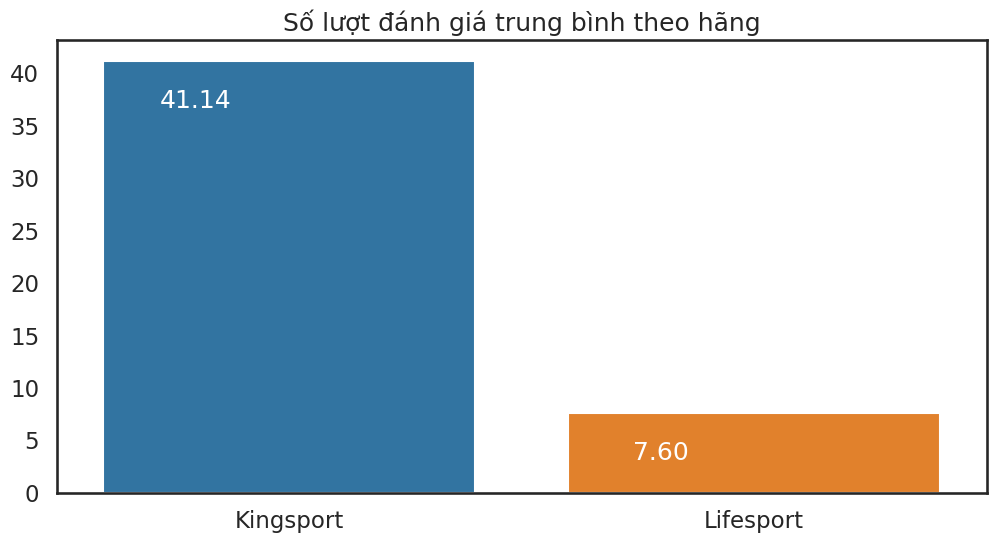

In [ ]:
ks_rating = ks_df.rating.mean()
ls_rating = ls_df.rating.mean()

with sns.axes_style("white"), sns.plotting_context("talk"):
    plt.figure(figsize= (12, 6), dpi=100)
    ax = sns.barplot(
        x = ["Kingsport", "Lifesport"],
        y = [ks_rating, ls_rating]
    )
    for k, p in zip([ks_rating, ls_rating], ax.patches):
        ax.annotate(f'\n{k:0.2f}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

    plt.title("Số lượt đánh giá trung bình theo hãng")